In [1]:
#import dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
#read csv and create initial DF
df = pd.read_csv('../Resources/clean_data/combineddata.csv')
df.head()

,Unnamed: 0,us_state,county,days_with_aqi2019,good_days2019,moderate_days2019,unhealthy_sensitive_days2019,unhealthy_days2019,very_unhealthy_days2019,hazardous_days2019,...,avg_hazardous_days,avg_co_days,avg_no2_days,avg_ozone_days,avg_so2_days,avg_pm2_days,avg_pm10_days,avg_poverty_percentage,pop_per_100k,cancer_classification
0,0,AL,Baldwin,271,237,34,0,0,0,0,...,0.0,0.0,0.0,215.25,0.0,57.25,0.0,10.4250,20.286986,high
1,1,AL,Clay,107,97,10,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,112.75,0.0,17.8000,25.963561,high
2,2,AL,Colbert,263,252,11,0,0,0,0,...,0.0,0.0,0.0,218.50,0.0,57.75,0.0,15.1250,19.761467,medium
3,3,AL,DeKalb,361,324,37,0,0,0,0,...,0.0,0.0,0.0,321.00,0.0,33.50,0.0,19.8750,15.357483,medium
4,4,AL,Elmore,228,208,20,0,0,0,0,...,0.0,0.0,0.0,198.25,0.0,0.00,0.0,12.0275,16.158522,medium


In [3]:
#keep average air quality, poverty, and classification columns
new_df = df[['avg_good_days', 'avg_moderate_days', 'avg_unhealthy_sensitive_days', 'avg_unhealthy_days',
            'avg_very_unhealthy_days', 'avg_hazardous_days', 'avg_co_days', 'avg_no2_days', 'avg_ozone_days',
            'avg_so2_days', 'avg_pm2_days', 'avg_pm10_days', 'avg_poverty_percentage', 'cancer_classification']]


new_df.head()

,avg_good_days,avg_moderate_days,avg_unhealthy_sensitive_days,avg_unhealthy_days,avg_very_unhealthy_days,avg_hazardous_days,avg_co_days,avg_no2_days,avg_ozone_days,avg_so2_days,avg_pm2_days,avg_pm10_days,avg_poverty_percentage,cancer_classification
0,242.50,29.75,0.25,0.0,0.0,0.0,0.0,0.0,215.25,0.0,57.25,0.0,10.4250,high
1,103.25,9.50,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,112.75,0.0,17.8000,high
2,256.50,19.50,0.25,0.0,0.0,0.0,0.0,0.0,218.50,0.0,57.75,0.0,15.1250,medium
3,318.25,36.00,0.25,0.0,0.0,0.0,0.0,0.0,321.00,0.0,33.50,0.0,19.8750,medium
4,184.75,13.50,0.00,0.0,0.0,0.0,0.0,0.0,198.25,0.0,0.00,0.0,12.0275,medium


In [4]:
#drop rows with null or NaN values
new_df.drop(index=new_df[new_df['cancer_classification'] == 'no data'].index, inplace=True)

new_df

C:\Users\Sarah Jr\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,avg_good_days,avg_moderate_days,avg_unhealthy_sensitive_days,avg_unhealthy_days,avg_very_unhealthy_days,avg_hazardous_days,avg_co_days,avg_no2_days,avg_ozone_days,avg_so2_days,avg_pm2_days,avg_pm10_days,avg_poverty_percentage,cancer_classification
0,242.50,29.75,0.25,0.00,0.00,0.00,0.0,0.00,215.25,0.0,57.25,0.00,10.4250,high
1,103.25,9.50,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,112.75,0.00,17.8000,high
2,256.50,19.50,0.25,0.00,0.00,0.00,0.0,0.00,218.50,0.0,57.75,0.00,15.1250,medium
3,318.25,36.00,0.25,0.00,0.00,0.00,0.0,0.00,321.00,0.0,33.50,0.00,19.8750,medium
4,184.75,13.50,0.00,0.00,0.00,0.00,0.0,0.00,198.25,0.0,0.00,0.00,12.0275,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,294.25,69.00,1.75,0.25,0.00,0.00,0.0,0.25,294.25,0.0,43.25,27.50,8.8750,medium
996,257.75,102.75,3.75,0.75,0.25,0.00,0.0,2.00,312.50,4.0,5.25,41.50,9.1275,low
997,310.50,54.25,0.50,0.00,0.00,0.00,0.0,0.00,347.75,0.0,16.75,0.75,6.3525,low
998,313.25,51.00,0.75,0.00,0.00,0.25,0.0,1.50,355.25,0.0,0.00,8.50,9.8275,low


In [5]:
#set X and y
X = new_df.drop('cancer_classification', axis=1)
y = new_df['cancer_classification']

print(X.shape, y.shape)

(923, 13) (923,)


In [6]:
#train, test, split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
#import Standard Scaler
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)


#tranform scaled data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
#Encode Labels 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

encoded_y_train = label_encoder.transform(y_train)

encoded_y_test = label_encoder.transform(y_test)

In [9]:
#One-hot encoding
from keras.utils import to_categorical

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
y_train_categorical

Using TensorFlow backend.


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [10]:
## Create a KNN model and fit it to the scaled training data
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_categorical)
    train_score = knn.score(X_train_scaled, y_train_categorical)
    test_score = knn.score(X_test_scaled, y_test_categorical)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.524
k: 3, Train/Test Score: 0.770/0.580
k: 5, Train/Test Score: 0.702/0.580
k: 7, Train/Test Score: 0.655/0.558
k: 9, Train/Test Score: 0.636/0.580
k: 11, Train/Test Score: 0.636/0.554
k: 13, Train/Test Score: 0.632/0.554
k: 15, Train/Test Score: 0.627/0.576
k: 17, Train/Test Score: 0.620/0.567
k: 19, Train/Test Score: 0.614/0.567


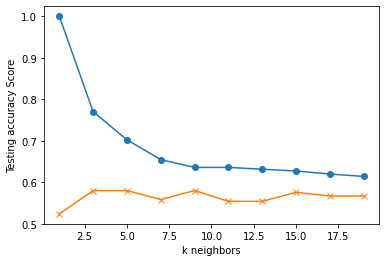

In [12]:
#plot KNN train and test data
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [14]:
#Select best K value to fit and score data - visually K=9 appears to be at elbow
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train_categorical)

#print train and test scores
print('k=9 Train Acc: %.3f' % knn.score(X_train_scaled, y_train_categorical))
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test_categorical))

k=9 Train Acc: 0.636
k=9 Test Acc: 0.580
